In [78]:
import gpxpy
import gpxpy.gpx
import geopy.distance

import pandas as pd
import matplotlib.pyplot as plt

In [79]:
from platform import python_version
print(python_version())

3.9.15


In [80]:
with open('/Users/arbatov/Downloads/Morning_Run.gpx', 'r') as gpx_file:
    gpx = gpxpy.parse(gpx_file)

In [4]:
gpx.get_track_points_no()

4119

In [5]:
gpx.get_elevation_extremes()

MinimumMaximum(minimum=11.3, maximum=22.3)

In [7]:
gpx.get_uphill_downhill()

UphillDownhill(uphill=30.799999999999997, downhill=34.89999999999998)

In [9]:
gpx.get_time_bounds()

TimeBounds(start_time=datetime.datetime(2022, 12, 25, 23, 2, 31, tzinfo=SimpleTZ("Z")), end_time=datetime.datetime(2022, 12, 26, 0, 11, 13, tzinfo=SimpleTZ("Z")))

In [11]:
moving_data = gpx.get_moving_data()

In [13]:
moving_data.moving_time

4015.0

In [14]:
moving_data.stopped_time

13.0

In [16]:
moving_data.max_speed

4.184236316253756

In [106]:
sampling = 2

route_info = []

for track in gpx.tracks:
    for segment in track.segments:
        for i, point in enumerate(segment.points[::sampling]):
            if i == 0:
                continue
                
            previous_point = segment.points[i - sampling]
            
            route_info.append({
                'time': point.time,
                'time_delta': point.time_difference(previous_point),
                'latitude': point.latitude,
                'longitude': point.longitude,
                'elevation': point.elevation,
                'speed': point.speed_between(previous_point),
                'distance': geopy.distance.distance(
                    (point.latitude, point.longitude), 
                    (previous_point.latitude, previous_point.longitude)
                ).km
            })
            
route_df = pd.DataFrame(route_info)
route_df['time'] = pd.to_datetime(route_df['time']).map(lambda x: x.tz_convert('Asia/Singapore'))

route_df.head(100)

,time,time_delta,latitude,longitude,elevation,speed,distance
0,2022-12-26 07:02:33+08:00,4120.0,1.309650,103.896767,14.3,0.028204,0.116083
1,2022-12-26 07:02:35+08:00,4.0,1.309642,103.896795,14.3,1.129477,0.004049
2,2022-12-26 07:02:37+08:00,5.0,1.309662,103.896833,15.2,1.654712,0.008199
3,2022-12-26 07:02:39+08:00,6.0,1.309675,103.896873,15.2,2.025663,0.012116
4,2022-12-26 07:02:41+08:00,7.0,1.309692,103.896917,15.2,2.371799,0.016568
...,...,...,...,...,...,...,...
95,2022-12-26 07:05:43+08:00,98.0,1.305243,103.899568,15.2,3.027594,0.294973
96,2022-12-26 07:05:45+08:00,99.0,1.305192,103.899603,15.2,3.032443,0.298462
97,2022-12-26 07:05:47+08:00,100.0,1.305137,103.899630,15.2,3.032887,0.301522
98,2022-12-26 07:05:49+08:00,101.0,1.305080,103.899657,15.2,3.038958,0.305152


In [120]:
route_df.dtypes

time          datetime64[ns, Asia/Singapore]
time_delta                           float64
latitude                             float64
longitude                            float64
elevation                            float64
speed                                float64
distance                             float64
dtype: object

<AxesSubplot:xlabel='time'>

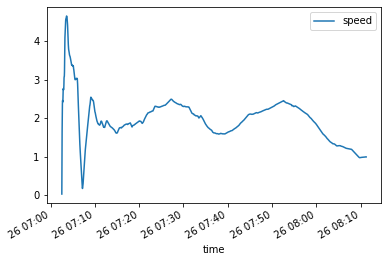

In [107]:
route_df.plot('time', 'speed')

<AxesSubplot:ylabel='Frequency'>

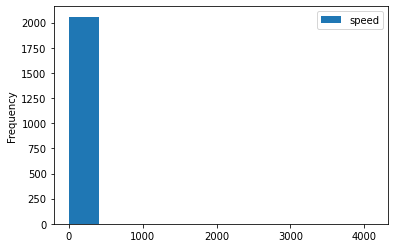

In [121]:
route_df.plot.hist(column=['speed'])

<AxesSubplot:xlabel='time'>

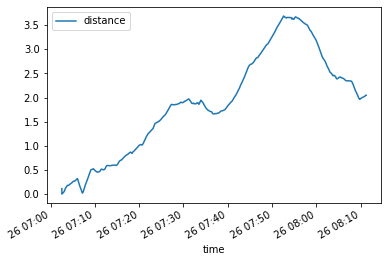

In [108]:
route_df.plot('time', 'distance')